In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [2]:
images_dir = './plants/validation'
validation_dir = './plants/validation'
image_size = 224

In [3]:
from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()
print("----------------------------------------")
model.load_weights('trained_last4_layers_model.h5')
# Show a summary of the model. Check the number of trainable parameters
model.summary()

<keras.engine.topology.InputLayer object at 0x0000024BD53BDD68> False
<keras.layers.convolutional.Conv2D object at 0x0000024BD53BDE10> False
<keras.layers.convolutional.Conv2D object at 0x0000024BD53BDF98> False
<keras.layers.pooling.MaxPooling2D object at 0x0000024BD53C37B8> False
<keras.layers.convolutional.Conv2D object at 0x0000024BD53F9A58> False
<keras.layers.convolutional.Conv2D object at 0x0000024BD53F9F60> False
<keras.layers.pooling.MaxPooling2D object at 0x0000024BD5423D68> False
<keras.layers.convolutional.Conv2D object at 0x0000024BD5448208> False
<keras.layers.convolutional.Conv2D object at 0x0000024BD5448D30> False
<keras.layers.convolutional.Conv2D object at 0x0000024BD54705F8> False
<keras.layers.pooling.MaxPooling2D object at 0x0000024BD54842E8> False
<keras.layers.convolutional.Conv2D object at 0x0000024BD54AA908> False
<keras.layers.convolutional.Conv2D object at 0x0000024BD54AA208> False
<keras.layers.convolutional.Conv2D object at 0x0000024BD54D1780> False
<keras.

PIL image size (224, 224)


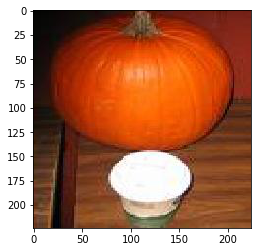

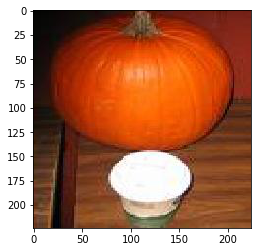

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


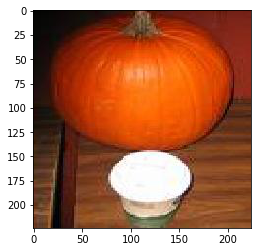

In [9]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline
 
filename = 'plants/img1.jpg'
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()
 
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)
 
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

# Inference for one image

In [10]:
from keras.applications import vgg16
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())

idx2label = {0: 'pumpkin', 1: 'tomato', 2: 'watermelon'}

# get the predicted probabilities for each class
predictions = model.predict(processed_image)
print (predictions)
# convert the probabilities to class labels
predicted_classes = np.argmax(predictions,axis=1)
print(predicted_classes)
pred_class = np.argmax(predictions[0])
print("Predicted class:",pred_class)
pred_label = idx2label[pred_class]
print("Predicted label:",pred_label)
conf =predictions[0][pred_class]
print("Confidence : {:.3f}".format(conf))

[[ 1.  0.  0.]]
[0]
Predicted class: 0
Predicted label: pumpkin
Confidence : 1.000


# Inference for n images in validation folder

Found 150 images belonging to 3 classes.
Ground truth:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
label2index
{'pumpkin': 0, 'tomato': 1, 'watermelon': 2}
idx2label
<class 'dict'>
{0: 'pumpkin', 1: 'tomato', 2: 'watermelon'}
15/15 [==============================] - 93s    
No of errors = 4/150
Predicted class: 1
Predicted label: tomato


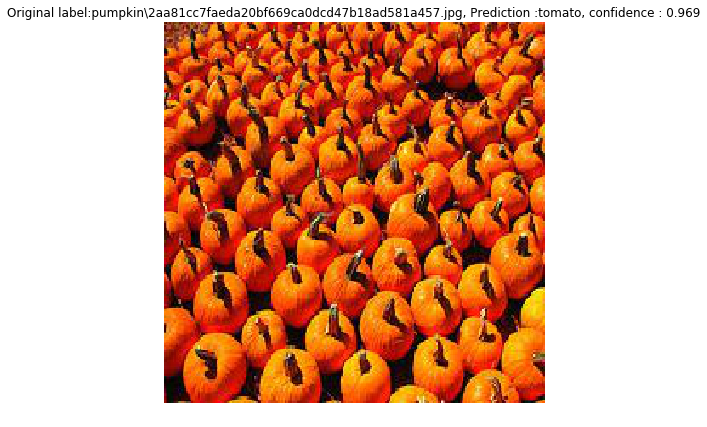

Predicted class: 2
Predicted label: watermelon


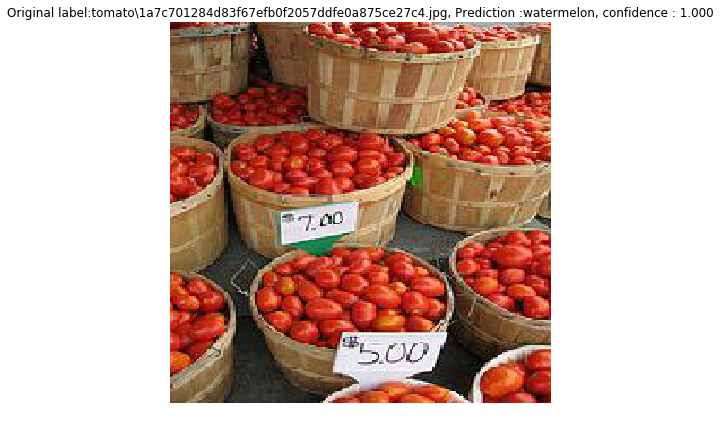

Predicted class: 0
Predicted label: pumpkin


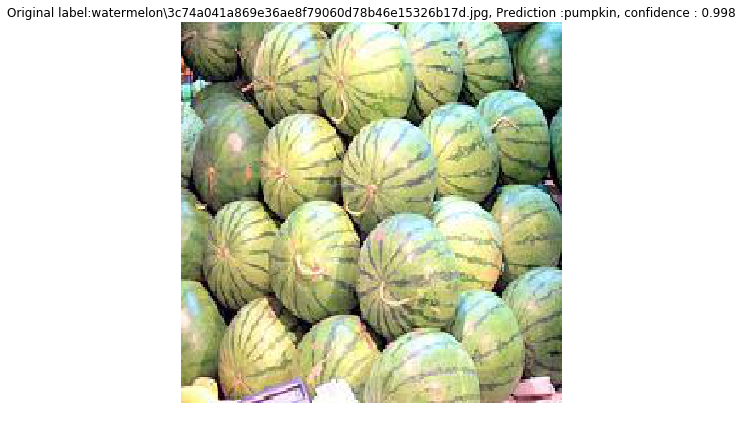

Predicted class: 0
Predicted label: pumpkin


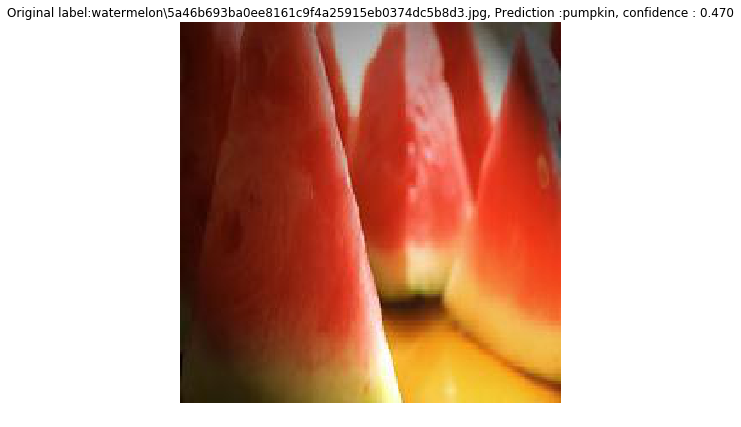

In [6]:
validation_datagen = ImageDataGenerator(rescale=1./255)
val_batchsize = 10
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Get the filenames from the generator
fnames = validation_generator.filenames

# Get the ground truth from generator
ground_truth = validation_generator.classes
print("Ground truth:")
print(ground_truth)
# Get the label to class mapping from the generator
label2index = validation_generator.class_indices
print("label2index")
print(label2index)
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
print("idx2label")
print(type(idx2label))
print(idx2label)

# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)

errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))

# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    print("Predicted class:",pred_class)
    pred_label = idx2label[pred_class]
    print("Predicted label:",pred_label)
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
    
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()

In [ ]:
print("Inference done.")